In [9]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
import statsmodels.api as sm

# Lab | Inferential statistics - ANOVA
Note: The following lab is divided in 2 sections which represent activities 3 and 4.

## Part 1
In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

### Context
Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder

Data was collected randomly and provided to you in the table as shown: link to the image - Data
https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png

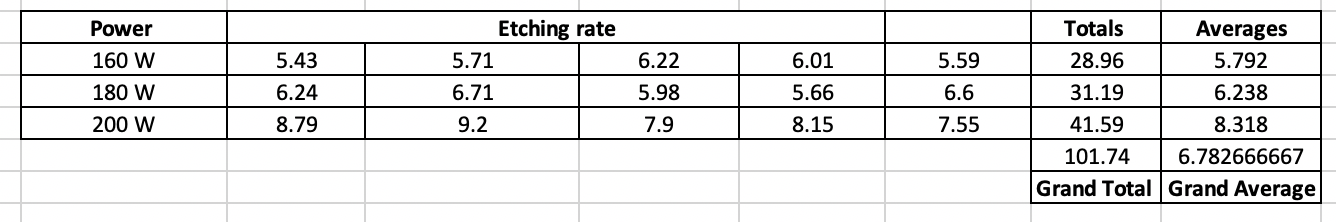

- State the null hypothesis

La hipotesis nula seria: No hay diferencia significativa en la tasa media de grabado para diferentes niveles de potencia del haz de plasma.

- State the alternate hypothesis

La hipotesis alternativa seria: Hay al menos una diferencia significativa en la tasa media de grabado para diferentes niveles de potencia del haz de plasma.

- What is the significance level

Nivel de significancia del 5% (0.05).

- What are the degrees of freedom of model, error terms, and total DoF

Si se tiene un total de k niveles de potencia del haz de plasma, donde k es el número de niveles de potencia del haz de plasma y donde n es el número total de observaciones.

1. Entonces los grados de libertad del modelo serán k-1 
- 3-1= 2

2. Grados de libertad de error: n-k
- 15-3= 12

3. Grados de libertad totales(DoF): n-1. 
- 15-1= 14

## Part 2

In [12]:
data = pd.read_excel('anova_lab_data.xlsx',sheet_name='data_collected')
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [17]:
data.columns = [col.replace(" ", "_").lower() for col in data]
data.columns

Index(['power_', 'etching_rate'], dtype='object')

- In this section, use Python to conduct ANOVA.

In [18]:
model = ols('etching_rate ~ C(power_)',data=data).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(power_),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


- What conclusions can you draw from the experiment and why?

Aqui podemos observar que 0.000008 > 0.05 por lo que podemos rechazar la hipotesis nula